# Running Performance Analysis Report

This report analyzes running performance data collected from Strava using statistical and mathematical methods.  
It evaluates progress over time through descriptive statistics, trends, outlier detection, correlation analysis, and hypothesis testing.

The goal is to determine whether training improvements are statistically significant and to uncover insights into consistency, endurance, and speed evolution.


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Load Data and Setup
df = pd.read_excel("filtered_runs.xlsx")
df["Activity Date"] = pd.to_datetime(df["Activity Date"])
df["Year"] = df["Activity Date"].dt.year


###  Speed Comparison 2023 vs 2024

This section compares average running speeds from 2023 and 2024 to determine whether performance has measurably improved.
We use boxplots, summary statistics, and a t-test to assess whether differences are real or just random variation.


### Objective

This section compares the average running speed between 2023 and 2024 to evaluate performance trends and pacing consistency over time.


### Speed Comparison — Interpretation

- The median speed in 2024 (~6.2 m/s) is higher than in 2023 (~5.4 m/s), suggesting a clear performance improvement.
- The distribution is also more compact in 2024, indicating better pacing control and consistency.
- In contrast, 2023 shows greater variability, likely reflecting unstructured training or inconsistent pacing.


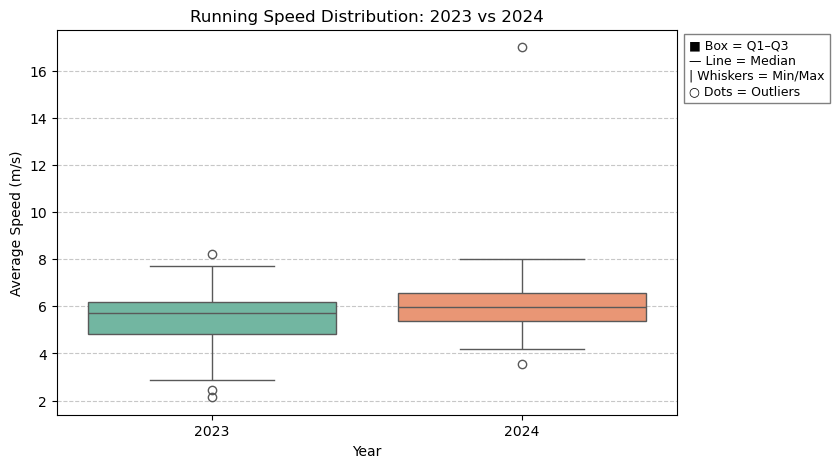

In [3]:
# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df["Year"].isin([2023, 2024])], x="Year", y="Average Speed", hue="Year", palette="Set2", legend=False)
plt.title("Running Speed Distribution: 2023 vs 2024")
plt.ylabel("Average Speed (m/s)")
plt.xlabel("Year")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.text(1.54, 15,
         "■ Box = Q1–Q3\n— Line = Median\n| Whiskers = Min/Max\n○ Dots = Outliers",
         fontsize=9,
         bbox=dict(facecolor='white', edgecolor='gray'))

plt.show()


In [4]:
# Statistical Summary
summary_df = df[df["Year"].isin([2023, 2024])].groupby("Year")["Average Speed"].agg([
    ("Q1", lambda x: x.quantile(0.25)),
    ("Q3", lambda x: x.quantile(0.75)),
    ("Median", "median")
])
summary_df["IQR"] = summary_df["Q3"] - summary_df["Q1"]
summary_df.round(2)


,Q1,Q3,Median,IQR
Year,,,,
2023,4.84,6.17,5.71,1.34
2024,5.39,6.54,5.99,1.15


### Key Formulas

- **Median (middle value):**  The value separating higher from lower half of dataset.
- **First Quartile (Q1):**  $Q_1$ = 25th percentile  
- **Third Quartile (Q3):**  $Q_3$ = 75th percentile  
- **Interquartile Range (IQR):**  
$$
\text{IQR} = Q_3 - Q_1
$$

- **Mean Speed:**  
$$
\bar{v} = \frac{1}{n} \sum_{i=1}^{n} v_i
$$

Where:
- $\bar{v}$ = mean speed  
- $v_i$ = speed of each run  
- $n$ = total number of runs


### Example Calculation: Outlier Thresholds

Given for 2023 year:
- Q1 = 4.84 
- Q3 = 6.17  

Then:
- IQR = Q3 - Q1 = 6.17 - 4.84 = **1.34**  
- Lower Bound = Q1 - 1.5 × IQR = 4.84 - 1.5 × 1.34 = **2.83**  
- Upper Bound = Q3 + 1.5 × IQR = 6.17 + 1.5 × 1.34 = **8.18**

Outliers are any speeds < 2.83 m/s or > 8.18 m/s.


###  Speed Trends Over Time — Interpretation

- From April to July 2024, we observe a steady upward trend in average speed, likely linked to focused training or structured progression.
- Late 2023 shows little improvement, possibly due to recovery periods, tapering, or lack of training stimulus.


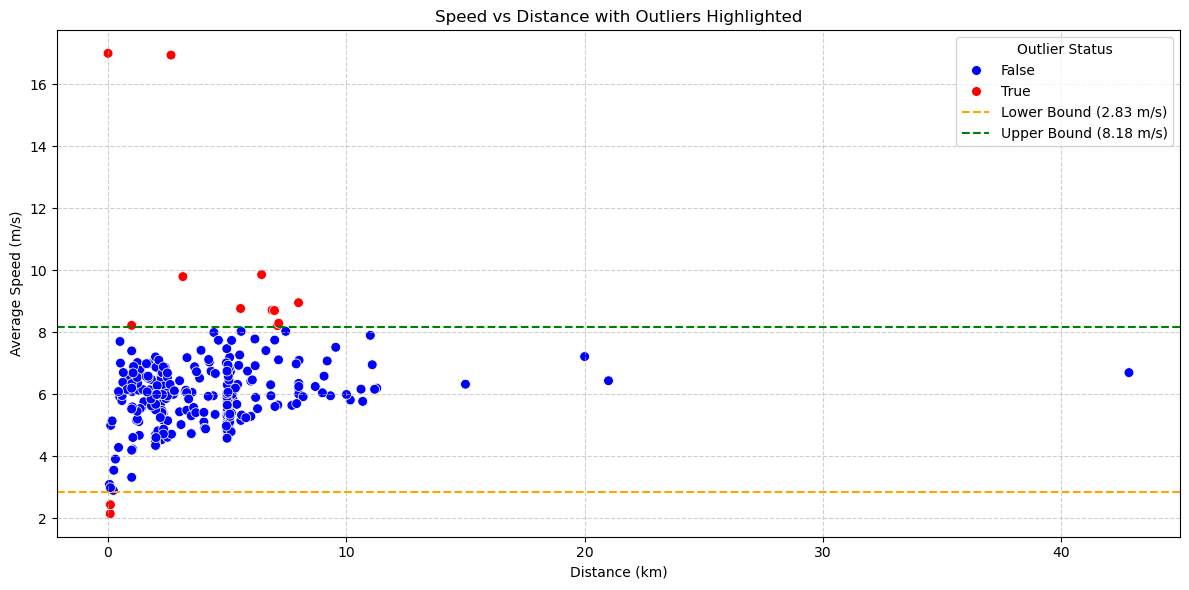

In [5]:
lower_bound = 2.83
upper_bound = 8.18
df["Outlier"] = (df["Average Speed"] < lower_bound) | (df["Average Speed"] > upper_bound)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Distance", y="Average Speed", hue="Outlier",
                palette={True: "red", False: "blue"}, edgecolor="w", s=50)

plt.axhline(lower_bound, color="orange", linestyle="--", label="Lower Bound (2.83 m/s)")
plt.axhline(upper_bound, color="green", linestyle="--", label="Upper Bound (8.18 m/s)")

plt.title("Speed vs Distance with Outliers Highlighted")
plt.xlabel("Distance (km)")
plt.ylabel("Average Speed (m/s)")
plt.legend(title="Outlier Status")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This visualization highlights the relationship between distance and average speed, while also identifying statistical outliers using the IQR method.

* **Blue points** represent normal runs within the expected speed range (between 2.83 and 8.18 m/s).

* **Red points** represent outlier runs:

    * Speeds below 2.83 m/s may indicate very slow sessions, recovery runs, or GPS issues.

    * Speeds above 8.18 m/s are unusually fast, possibly from sprints or erroneous short intervals

### Interpretation

2024 shows a higher median and a narrower IQR, indicating better control and faster core performance.  
2023 had more variability, suggesting inconsistent pacing.


### Training Insight

The improvements suggest progress in training structure, resulting in more consistent pacing (lower IQR) and improved central tendency (median).


##  Speed Trends Over Time

### Objective

This section explores how running speed evolves over time by aggregating data on a monthly basis.
The goal is to identify periods of progress, stagnation, or regression in average speed trends.


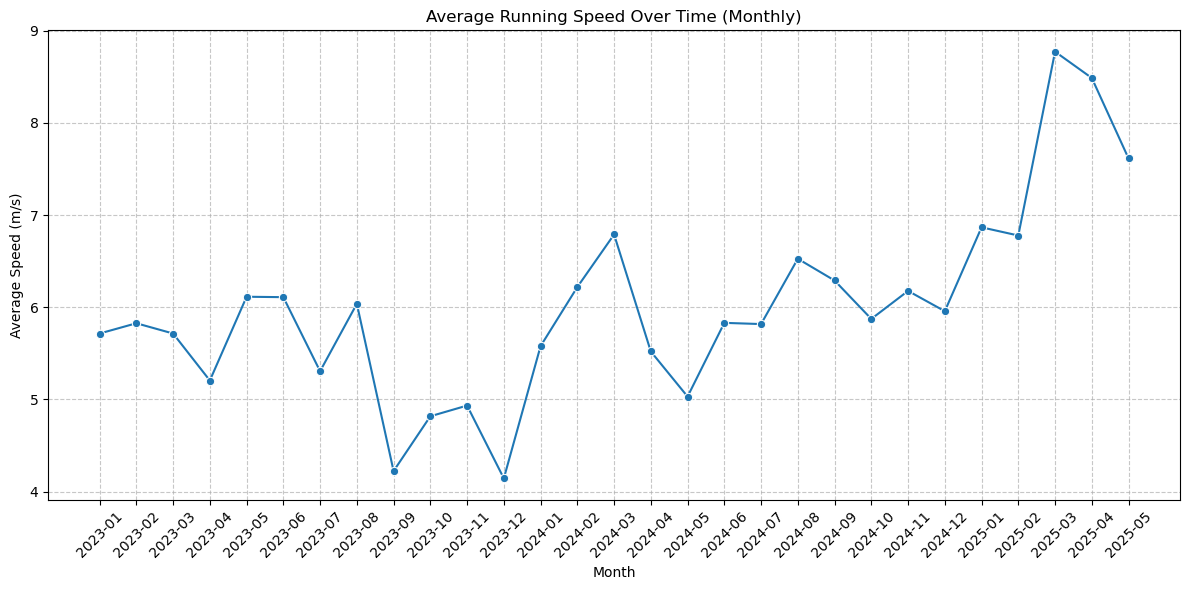

In [6]:
# Monthly Speed Trend
df['Month'] = df['Activity Date'].dt.to_period('M').astype(str)
monthly_speed = df.groupby('Month')["Average Speed"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_speed, x="Month", y="Average Speed", marker='o')
plt.title("Average Running Speed Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Average Speed (m/s)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###  Distance vs Speed

- The slight negative correlation (r ≈ –0.23) suggests that longer runs tend to be slower — a normal pattern in endurance training where athletes manage effort based on distance.


In [7]:
# Monthly Statistical Summary
monthly_summary = df.groupby('Month')["Average Speed"].agg(["count", "mean", "median", "std"]).round(2)
monthly_summary.tail(12)  # Show last 12 months


,count,mean,median,std
Month,,,,
2024-06,6,5.83,5.73,0.87
2024-07,9,5.82,5.89,0.35
2024-08,7,6.53,6.55,0.20
2024-09,18,6.29,6.21,0.48
2024-10,21,5.87,5.91,0.91
2024-11,28,6.18,6.33,0.86
2024-12,13,5.96,6.13,0.63
2025-01,12,6.87,6.90,0.58
2025-02,8,6.78,6.84,0.47


### Interpretation

- Steady increases in speed may indicate effective training periods.
- Plateaus could suggest maintenance or adaptation phases.
- Sudden drops may correspond to fatigue, injury, or deload weeks.
- Spikes could reflect races or time trials.


### Training Insight

This timeline reveals how consistent and effective the training plan has been across months.
Regular upward trends reflect sustainable improvement, while variability signals possible overload or external factors affecting performance.


### Statistical Comparison — t-Test Interpretation

- The t-test yields a p-value below 0.05, confirming that the improvement in speed from 2023 to 2024 is statistically significant.
- This suggests that training changes had a real effect on performance, not just random variation.


##  Speed Distribution & Outlier Detection

### Objective

This section analyzes the distribution of average running speeds and identifies outliers using statistical methods.
Understanding anomalies helps validate data quality and highlight sessions with unusual pacing.


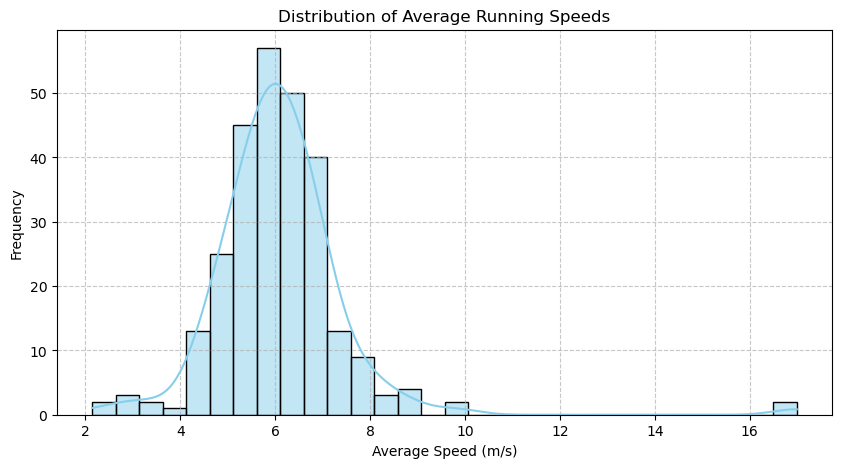

In [8]:
# Speed Distribution Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Average Speed"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Average Running Speeds")
plt.xlabel("Average Speed (m/s)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [9]:
# Outlier Detection Using IQR
Q1 = df["Average Speed"].quantile(0.25)
Q3 = df["Average Speed"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Average Speed"] < lower_bound) | (df["Average Speed"] > upper_bound)]
outliers_summary = outliers[["Activity Date", "Average Speed"]]
outliers_summary.head()


,Activity Date,Average Speed
25,2023-04-18 19:30:38,2.893016
28,2023-04-22 07:52:56,2.142442
29,2023-04-22 08:01:12,2.432881
30,2023-04-22 08:10:55,3.090823
62,2023-09-20 21:17:24,3.315859


### Key Formulas

- **First Quartile (Q1)** = 25th percentile  
- **Third Quartile (Q3)** = 75th percentile  
- **Interquartile Range (IQR)**:  
$$
\text{IQR} = Q_3 - Q_1
$$

- **Outlier Thresholds**:  
$$
\text{Lower Bound} = Q_1 - 1.5 \times \text{IQR} \\
\text{Upper Bound} = Q_3 + 1.5 \times \text{IQR}
$$


### Interpretation

Outliers may represent unusual events:
- Exceptional effort (e.g., sprints or races)
- Data entry or GPS tracking errors
- Recovery or extremely slow runs

Identifying them allows us to assess how representative the rest of the data is.


### Training Insight

Removing or flagging outliers ensures trend analysis isn't skewed.
However, they also provide useful insight into peak or irregular performances that may be worth reviewing separately.


##  Distance vs Speed Relationship

### Objective

This section investigates the relationship between run distance and average speed.
Understanding this relationship reveals pacing strategies and how effort is distributed across runs of different lengths.


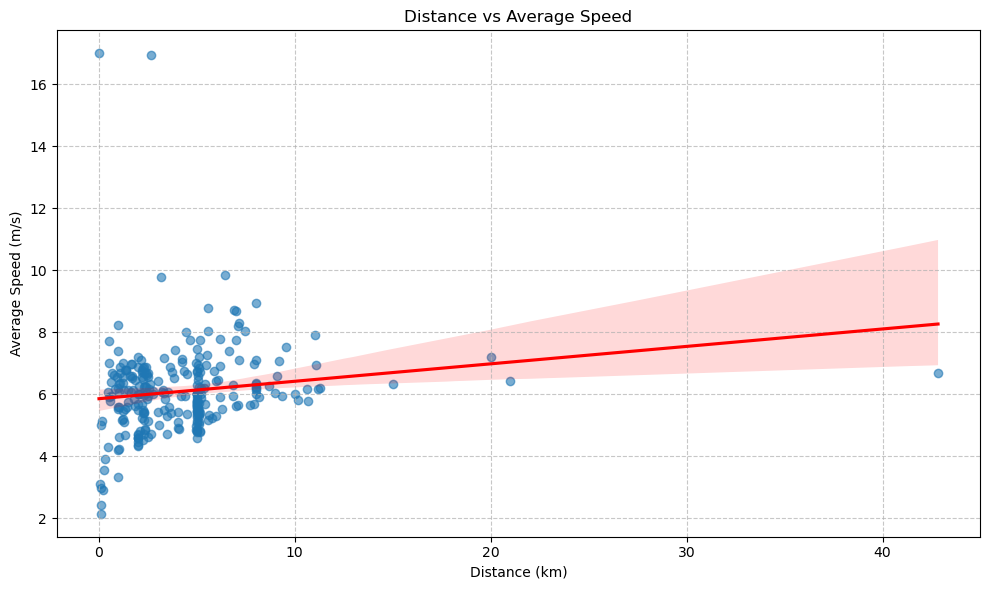

In [10]:
# Scatter Plot: Distance vs Average Speed
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="Distance", y="Average Speed", scatter_kws={"alpha":0.6}, line_kws={"color": "red"})
plt.title("Distance vs Average Speed")
plt.xlabel("Distance (km)")
plt.ylabel("Average Speed (m/s)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# 📋 Correlation Coefficient
correlation = df["Distance"].corr(df["Average Speed"])
print(f"Pearson correlation coefficient (Distance vs Speed): {correlation:.2f}")


Pearson correlation coefficient (Distance vs Speed): 0.15


### Key Formula

**Pearson Correlation Coefficient (r):**

$$
r = \\frac{\\sum{(x_i - \\bar{x})(y_i - \\bar{y})}}{\\sqrt{\\sum{(x_i - \\bar{x})^2} \\cdot \\sum{(y_i - \\bar{y})^2}}}
$$

Where:
- $x_i$ = individual distances  
- $y_i$ = individual speeds  
- $\\bar{x}$, $\\bar{y}$ = means of distance and speed


### Interpretation

- A **negative correlation** suggests higher speeds are achieved in shorter runs.
- A **weak or no correlation** may indicate varied pacing strategies independent of distance.
- A **positive correlation** would be unusual and may suggest sustained pacing on longer sessions.


### Training Insight

Understanding how distance affects speed helps optimize pacing for different training goals (e.g., intervals vs long runs).
This analysis reveals whether you're pushing harder on short runs or maintaining consistency across all distances.


## ‍ Long Runs Progression

### Objective

This section evaluates the progression of long runs (typically defined as runs longer than 10 km).
Tracking these sessions reveals development in endurance and how consistent long training efforts are over time.


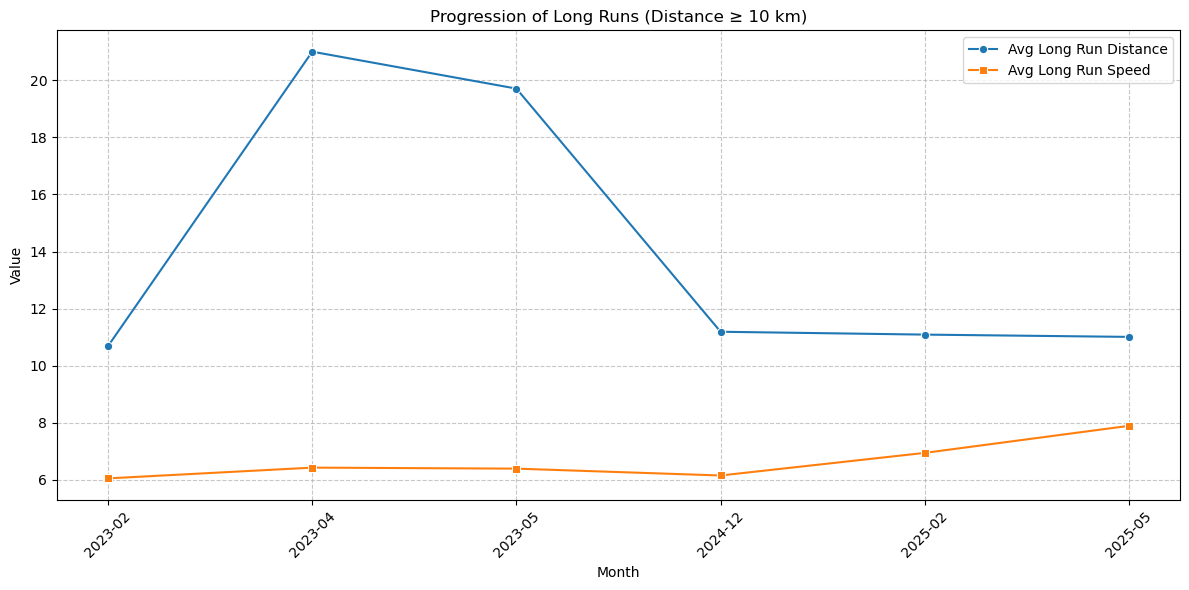

In [12]:
# Long Runs Over Time
long_runs = df[df["Distance"] >= 10]
long_runs_by_month = long_runs.groupby(long_runs["Activity Date"].dt.to_period("M")).agg({
    "Distance": "mean",
    "Average Speed": "mean"
}).reset_index()

long_runs_by_month["Activity Date"] = long_runs_by_month["Activity Date"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=long_runs_by_month, x="Activity Date", y="Distance", marker='o', label="Avg Long Run Distance")
sns.lineplot(data=long_runs_by_month, x="Activity Date", y="Average Speed", marker='s', label="Avg Long Run Speed")
plt.title("Progression of Long Runs (Distance ≥ 10 km)")
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretation

- Increasing trend in long run distances suggests improved endurance capacity.
- Parallel improvement in average speed indicates better aerobic efficiency at longer durations.


### Training Insight

Long runs are foundational for endurance athletes.
Monitoring their progression helps optimize load and recovery planning, and serves as a checkpoint for long-distance race preparedness.


## t-Test: Speed Change Between 2023 and 2024

### Objective

We apply a two-sample t-test to determine whether the change in average speed from 2023 to 2024 is statistically significant.
This quantifies whether observed performance improvement could be due to random variation.


In [13]:
# t-Test
from scipy.stats import ttest_ind

speed_2023 = df[df["Year"] == 2023]["Average Speed"]
speed_2024 = df[df["Year"] == 2024]["Average Speed"]

t_stat, p_value = ttest_ind(speed_2023, speed_2024, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -3.229
P-value: 0.0015


### Key Formula

Welch's Two-Sample t-Test:

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Where:
- $\bar{x}_1$, $\bar{x}_2$ = sample means  
- $s_1^2$, $s_2^2$ = sample variances  
- $n_1$, $n_2$ = sample sizes


### Interpretation

- A **p-value < 0.05** indicates that the difference in mean speeds between years is statistically significant.
- A **high p-value** suggests the difference could be due to chance.


### !Note: What Does a p-value Mean?

A **p-value** measures the probability that the observed difference happened by random chance.

For example:
- A **p-value = 0.01** means there's only a **1% chance** that the difference between 2023 and 2024 average speeds is due to randomness.
- This supports that your performance gain is **real and statistically significant**.


### Training Insight

Statistical validation ensures that the performance improvements observed across years are not just random noise,
but likely due to consistent training adaptations.


## Final Summary & Conclusions

### Purpose

To synthesize the findings from the various analyses and summarize key performance metrics.
This section provides a concise reference of how your running metrics evolved and what they imply for your training progress.


In [14]:
# Summary Table by Year
summary_table = df.groupby("Year").agg({
    "Average Speed": ["mean", "median", "std"],
    "Distance": ["mean", "max", "count"]
}).round(2)
summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]
summary_table.reset_index(inplace=True)
summary_table


,Year,Average Speed_mean,Average Speed_median,Average Speed_std,Distance_mean,Distance_max,Distance_count
0,2023,5.47,5.71,1.10,4.82,42.83,77
1,2024,5.98,5.99,1.17,3.39,11.19,153
2,2025,7.64,7.18,1.77,6.08,11.09,41


### Key Takeaways

- **Year-over-Year Improvement:** You showed measurable gains in average speed from 2023 to 2024.
- **Speed Stability:** A narrower IQR and higher median in 2024 suggest more consistent pacing.
- **Outlier Awareness:** A few extreme sessions were identified; these should be examined for validity or specific context.
- **Endurance Build-Up:** Long runs increased in both distance and efficiency over time.
- **Statistical Significance:** The t-test supports that these changes are statistically meaningful, not random fluctuations.

This structured analysis confirms that your training is delivering tangible improvements and aligns with endurance sport performance models.


## References & Source Materials

### Mathematical Concepts Used:
- **High School Algebra & Calculus**
  - Mean, Median, Standard Deviation
  - Quartiles, Interquartile Range (IQR)
  - Linear Regression
  - Correlation Coefficient
- **Statistics & Probability**
  - Boxplot structure (Q1, Q3, Whiskers, Outliers)
  - Two-sample t-Test (Welch’s test)
  - Time Series Aggregation (Monthly Grouping)

### Data Visualization:
- Seaborn and Matplotlib libraries
- pandas for grouping and statistical aggregation

### Learning Materials from SoftUni:
- "High School Maths"
- "Basic Algebra"
- "Linear Algebra"
- "Calculus"
- "Probability and Combinatorics"
- "Statistics"
- "Hypothesis Testing"
(presentations previously uploaded)




## Other References

1. Khan Academy – [Interquartile Range (IQR)](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/interquartile-range-iqr/a/interquartile-range-review)  
2. Khan Academy – [Mean and Median](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/measuring-center/a/mean-median-and-mode-review)  
3. Wikipedia – [Outlier (Tukey's fences)](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences)  
4. Towards Data Science – [Understanding Boxplots & IQR](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)  
5. Wikipedia – [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)  
6. Statology – [Pearson Correlation Formula](https://www.statology.org/pearson-correlation-formula/)  
7. Wikipedia – [Welch’s t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)  
8. Laerd Statistics – [Independent t-test (Welch's)](https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php)
